# Introduction to `explainy` - black-box model explanations for humans
In this notebook, we will go over the main algorithms of the `explainy` package.

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

### Installing Explainy
We recommend using some virtual environment. Then there are mainly two ways.

With pip:

`pip install explainy`

In [ ]:
%%capture
!pip install explainy==0.2.5

In [ ]:
import explainy
print(explainy.__version__)

`explainy` allows you to create machine learning model explanations based on four different explanation characteristics:

-   **global**: explanation of system functionality
-   **local**: explanation of decision rationale
-   **contrastive**: tracing of decision path
-   **non-contrastive**: parameter weighting

The explanations algorithms in `explainy` can be categorized as follows:

| | non-contrastive				|contrastive | 
| --- 			| --- 				| --- | 
|global|Permutation Feature Importance	| Surrogate Model | 
|local|Shap Values	| Counterfactual Example|


In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

diabetes = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=0
)
X_test = pd.DataFrame(X_test, columns=diabetes.feature_names)
y_test = pd.DataFrame(y_test)

model = RandomForestRegressor(random_state=0).fit(X_train, y_train)

In [ ]:
from explainy.explanations import PermutationExplanation

number_of_features = 4
sample_index = 1

explainer = PermutationExplanation(
    X_test, y_test, model, number_of_features
)
explanation = explainer.explain(sample_index)
print(explanation)
explainer.plot(kind='bar')

In [ ]:
explainer.plot(kind='box')

Generate explanations with multiple numbers of features to explain the outcoume.
Since the `PermuationExplanation` method is a global explaination method, all samples will have the same feature importance explanation.

In [ ]:
# Global, Non-contrastive
sample_index = 0
for number_of_features in [3, 6, 9]:
    explainer = PermutationExplanation(
        X_test, y_test, model, number_of_features
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(kind='box')
    print(explanation)
    print('\n'*2)

Let's use the `ShapExplanation` to create local explantions for each sample individually.

In [ ]:
from explainy.explanations import ShapExplanation

# Local, Non-contrastive
number_of_features = 4
for sample_index in [0, 1, 2]:

    explainer = ShapExplanation(
        X_test, y_test, model, number_of_features
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(sample_index)
    print(explanation)
    print('\n'*2)

Let's use the `SurrogateModelExplanation` to create global explantions.

In [ ]:
from explainy.explanations import SurrogateModelExplanation

# Global, Contrastive
list_number_of_features = [2, 4]
sample_index = 0
for number_of_features in list_number_of_features:

    explainer = SurrogateModelExplanation(
        X_test, y_test, model, number_of_features
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(sample_index)
    print(explanation)
    print('\n'*2)

Let's use the `CounterfactualExplanation` to create local explantions and show, how the feature would have had to change to achieve a desired y value.

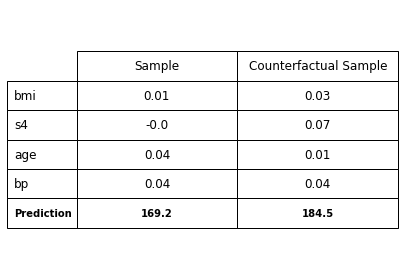

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance is shown using a counterfactual example.
The sample would have had the desired prediction of '184.5', if the 'bmi' was '0.03', the 's4' was '0.07', the 'age' was '0.01', and the 'bp' was '0.04'.





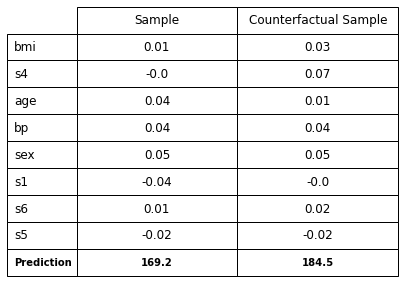

The RandomForestRegressor used 10 features to produce the predictions. The prediction of this sample was 169.2.
The feature importance is shown using a counterfactual example.
The sample would have had the desired prediction of '184.5', if the 'bmi' was '0.03', the 's4' was '0.07', the 'age' was '0.01', the 'bp' was '0.04', the 'sex' was '0.05', the 's1' was '-0.0', the 's6' was '0.02', and the 's5' was '-0.02'.





In [10]:
from explainy.explanations import CounterfactualExplanation

# Local, Contrastive
number_of_features = 6
sample_index = 2
for number_of_features in [4, 8]:
    explainer = CounterfactualExplanation(
        X_test, y_test, model, number_of_features, y_desired=180.
    )
    explanation = explainer.explain(sample_index)
    explainer.plot(sample_index)
    print(explanation)
    print('\n'*2)